# Modélisation du double pendule

## Lagrangien Libre

Le lagrangien pour deux particules  
- une de masse $m$  et de coordonnées $(x,y)$ 
- l'autre de masse $M$ et de coordonnées $(X,Y)$

dans un champs gravitationnels constant vaut
$$L:=m\frac{\dot{x}^2+\dot{y}^2}{2}-mgy+M\frac{\dot{X}^2+\dot{Y}^2}{2}-Mgy.$$

## Contrainte cinématique

Dans le cas du double pendule de longueur $r$ et $R$ on introduit les deux angles  entre la verticale et le pendule et on obtient
$$
\begin{cases}
x=r\sin(\theta)\\
y=r\cos(\theta)
\end{cases},\qquad 
\begin{cases}
X=x+R\sin(\phi)\\
Y=y+R\cos(\phi)
\end{cases},\qquad 
$$

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(12,9))

In [11]:
import numpy as np

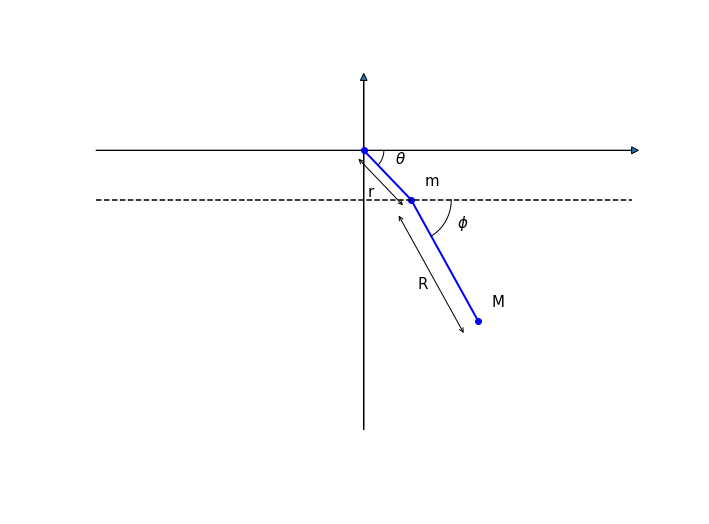

In [51]:
fig, ax = plt.subplots()

ax.axis("off")
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 2)
ax.arrow(-4, 0, 8, 0, head_width=0.1, head_length=0.1)
ax.arrow(0, -4, 0, 5, head_width=0.1, head_length=0.1)


r, R, theta, phi = 1, 2, -np.pi/4, -np.pi/3
x, y = r*np.cos(theta), r*np.sin(theta)
X, Y = x + R*np.cos(phi), y+R*np.sin(phi)
ax.plot([0, x, X], [0, y, Y], marker="o", lw=2, color="blue")
ax.annotate(s="", xy=(-0.1, -0.1), xytext=(x-0.1, y-0.1), arrowprops=dict(arrowstyle='<->'))
ax.text(x/2-0.3, y/2-0.3, "r", fontsize=15)
ax.annotate(s="", xy=(x-0.2, y-0.2), xytext=(X-0.2, Y-0.2), arrowprops=dict(arrowstyle='<->'))
ax.text((x+X)/2-0.4, (y+Y)/2-0.4, "R", fontsize=15)

th = np.linspace(0, theta, 50)
u, v = 0.3*r*np.cos(th), 0.3*r*np.sin(th)
ax.plot(u, v, lw=1, color='black')
ax.text(0.5*r*np.cos(theta/2), 0.5*r*np.sin(theta/2), r"$\theta$", fontsize=15)
ax.text(x+0.2, y+0.2, "m", fontsize=15)

ph = np.linspace(0, phi, 50)
U, V = x+0.3*R*np.cos(ph), y+0.3*R*np.sin(ph)
ax.plot(U, V, lw=1, color="black")
ax.text(x+0.4*R*np.cos(phi/2), y+0.4*R*np.sin(phi/2), r"$\phi$", fontsize=15)
ax.text(X+0.2, Y+0.2, "M", fontsize=15)

ax.plot([-4, 4], [y, y], ls="--", color="black")

### Lagrangien nouvelles coordonnées

Le lagrangien s'écrit alors
$$
L:=m_1\frac{(r_1 \dot{\theta_1})^2}{2}+m_1gr_1\cos(\theta_1)+m_2\left(\frac{(r_1 \dot{\theta_1})^2}{2}+\frac{(r_2 \dot{\theta_2})^2}{2}+r_1\dot{\theta_1}r_2\dot{\theta_2}\cos(\theta_1-\theta_2)\right)+m_2g\left(r_1\cos(\theta_1)+r_2\cos(\theta_2)\right)
$$

### Equations d'Euler-Lagrange

On peut maintenant écrire les équations d'Euler-Lagrange
$$
\begin{cases}
\frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial \dot{\theta_1}}=\frac{\partial L}{\partial\theta_1}\\
\frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial \dot{\theta_2}}=\frac{\partial L}{\partial\theta_2}
\end{cases}
$$

Or on peut calculer
$$
\begin{cases}
\frac{\partial L}{\partial \dot{\theta}_1}=m_1 r_1^2\dot{\theta}_1+m_2 r_1^2\dot{\theta}_1+m_2r_1r_2 \dot{\theta}_2\cos(\theta_1-\theta_2)\\
\frac{\partial L}{\partial \dot{\theta}_2}=m_2 r_2^2\dot{\theta}_2+m_2r_1r_2 \dot{\theta}_1\cos(\theta_1-\theta_2)\\
\frac{\partial L}{\partial \theta_1}=-m_1gr_1\sin(\theta_1)-m_2r_1r_2\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)-m_2gr_1\sin(\theta_1),\\
\frac{\partial L}{\partial \theta_2}=m_2r_1r_2\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)-m_2gr_2\sin(\theta_2),
\end{cases}
$$


Ce qui donne donc les équations d'Euler-Lagrange suivantes
$$
\begin{cases}
m_1 r_1^2\ddot{\theta}_1+m_2 r_1^2\ddot{\theta}_1+m_2r_1r_2 \ddot{\theta}_2\cos(\theta_1-\theta_2)+m_2r_1r_2 (\dot{\theta}_2)^2\sin(\theta_1-\theta_2)-m_2r_1r_2\dot{\theta}_1 \dot{\theta}_2\sin(\theta_1-\theta_2)=-m_1gr_1\sin(\theta_1)-m_2r_1r_2\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)-m_2gr_1\sin(\theta_1)\\
m_2 r_2^2\ddot{\theta}_2+m_2r_1r_2 \ddot{\theta}_1\cos(\theta_1-\theta_2)-m_2r_1r_2 (\dot{\theta}_1)^2\sin(\theta_1-\theta_2)+m_2r_1r_2 \dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)=m_2r_1r_2\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)-m_2gr_2\sin(\theta_2)
\end{cases}
$$

Et après rapide simplification
$$
\begin{cases}
(m_1+m_2) r_1^2\ddot{\theta}_1+m_2r_1r_2 \ddot{\theta}_2\cos(\theta_1-\theta_2)=-(m_1+m_2)gr_1\sin(\theta_1)-m_2r_1r_2 (\dot{\theta}_2)^2\sin(\theta_1-\theta_2)\\
m_2 r_2^2\ddot{\theta}_2+m_2r_1r_2 \ddot{\theta}_1\cos(\theta_1-\theta_2)=m_2r_1r_2 (\dot{\theta}_1)^2\sin(\theta_1-\theta_2)-m_2gr_2\sin(\theta_2)
\end{cases}
$$


## Mise sous forme définie

On voit que les termes de plus haut de degrés apparaissent linéairement. La matrice étant
$$
M(\theta_1,\theta_2):=\begin{pmatrix}
(m_1+m_2)r^2_1 & m_2r_1r_2\cos(\theta_1-\theta_2)\\
m_2r_1r_2\cos(\theta_1-\theta_2) & m_2r_2^2
\end{pmatrix}
$$

Or le déterminant de celle-ci est
$$d:=\mathrm{det}M(\theta_1,\theta_2)=m_2 (r_1r_2)^2(m_1+m_2(1-\cos^2(\theta_1-\theta_2)))>0.$$

On arrive alors à
$$
M^{-1}(\theta_1, \theta_2)=
\frac{1}{m_2 (r_1r_2)^2(m_1+m_2(1-\cos^2(\theta_1-\theta_2)))}
\begin{pmatrix}
m_2 r_2^2 & -m_2r_1r_2\cos(\theta_1-\theta_2)\\
-m_2r_1r_2\cos(\theta_1-\theta_2) & (m_1+m_2)r_1^2
\end{pmatrix}
$$

On peut alors l'inverser pour obtenir le système
\begin{equation}
\begin{pmatrix}
\ddot{\theta}_1\\
\ddot{\theta}_2
\end{pmatrix}
= M^{-1}(\theta_1, \theta_2)
\begin{pmatrix}
-(m_1+m_2)gr_1\sin(\theta_1)-m_2r_1r_2 (\dot{\theta}_2)^2\sin(\theta_1-\theta_2)\\
m_2r_1r_2 (\dot{\theta}_1)^2\sin(\theta_1-\theta_2)-m_2gr_2\sin(\theta_2)
\end{pmatrix}
\end{equation}

# Formulation Hamiltonienne

## Changement de variable

On pose 
$$
\begin{cases}
p_1:=\frac{\partial L}{\partial \dot{\theta_1}}=m_1 r_1^2\dot{\theta}_1+m_2 r_1^2\dot{\theta}_1+m_2r_1r_2 \dot{\theta}_2\cos(\theta_1-\theta_2)\\
p_2:=\frac{\partial L}{\partial \dot{\theta_2}}=m_2 r_2^2\dot{\theta}_2+m_2r_1r_2 \dot{\theta}_1\cos(\theta_1-\theta_2)
\end{cases}
$$

On voit que la relation s'écrit aussi
$$
\begin{pmatrix}
p_1 \\ p_2
\end{pmatrix}
= M(\theta_1, \theta_2)
\begin{pmatrix}
\dot{\theta}_1 \\ \dot{\theta}_2
\end{pmatrix}
$$

et donc
$$
\begin{cases}
\dot{\theta}_1=\frac{m_2r_2^2p_1-m_2r_1r_2\cos(\theta_1-\theta_2)p_2}{m_2 (r_1r_2)^2(m_1+m_2(1-\cos^2(\theta_1-\theta_2)))}\\
\dot{\theta}_2=\frac{(m_1+m_2)r_1^2p_2-m_2r_1r_2\cos(\theta_1-\theta_2)p_1}{m_2 (r_1r_2)^2(m_1+m_2(1-\cos^2(\theta_1-\theta_2)))}
\end{cases}
$$

## Hamiltonien

Mais on sait alors que si l'on construit la fonction
$$H:=p_1\dot{\theta}_1+p_2\dot{\theta}_2-L(\theta_1,\theta_2,\dot{\theta}_1,\dot{\theta}_2)=
(m_1+m_2)\frac{(r_1 \dot{\theta_1})^2}{2}+m_2\frac{(r_2 \dot{\theta_2})^2}{2}+m_2r_1r_2\dot{\theta_1}\dot{\theta_2}\cos(\theta_1-\theta_2)-(m_1+m_2)gr_1\cos(\theta_1)-m_2 g r_2\cos(\theta_2)
,$$
On a alors
$$
\begin{cases}
\dot{\theta}_1=\frac{\partial H}{\partial p_1}\\
\dot{\theta}_2=\frac{\partial H}{\partial p_2}\\
\dot{p}_1=-\frac{\partial H}{\partial \theta_1}\\
\dot{p}_2=-\frac{\partial H}{\partial \theta_2}
\end{cases}
$$

Or on a 
$$\dot{\theta}_1^2=\frac{1}{d^2}\left(m_2^2r_2^4p_1^2+m_2^2r_1^2r_2^2\cos^2(\theta_1-\theta_2)p_2^2-2m_2^2 r_1 r_2^3\cos(\theta_1-\theta_2)p_1 p_2\right).$$
$$\dot{\theta}_2^2=\frac{1}{d^2}\left((m_1+m_2)^2r_1^4p_2^2+m_2^2r_1^2r_2^2\cos^2(\theta_1-\theta_2)p_1^2-2m_2(m_1+m_2) r_1^3 r_2\cos(\theta_1-\theta_2)p_1 p_2\right).$$
$$\dot{\theta}_1\dot{\theta}_2=\frac{1}{d^2}\left((m_2(m_1+m_2)r_1^2r_2^2+m_2^2r_1^2r_2^2\cos^2(\theta_1-\theta_2))p_1p_2-m_2^2r_1r_2^3\cos(\theta_1-\theta_2)p_1^2-m_2(m_1+m_2)r_1^3r_2\cos(\theta_1-\theta_2)p_2^2
\right).$$


On peut donc écrire
$$p_1\dot{\theta}_1+p_2\dot{\theta}_2-L(\theta_1,\theta_2,\dot{\theta}_1,\dot{\theta}_2)=
(m_1+m_2)\frac{(r_1 \dot{\theta_1})^2}{2}+m_2\frac{(r_2 \dot{\theta_2})^2}{2}+m_2r_1r_2\dot{\theta_1}\dot{\theta_2}\cos(\theta_1-\theta_2)=\frac{1}{d^2}\Big(\\
p_1^2\left(\frac{(m_1+m_2)m_2^2}{2}r_1^2r_2^4+\frac{m_2^3}{2}r_1^2r_2^4\cos^2(\theta_1-\theta_2)
-m_2^3r_1^2r_2^4\cos^2(\theta_1-\theta_2)\right)\\
+p_2^2\left(\frac{(m_1+m_2)m_2^2}{2}r_1^4r_2^2\cos^2(\theta_1-\theta_2)+\frac{m_2(m_1+m_2)^2}{2}r_1^4r_2^2
-m_2^2(m_1+m_2)r_1^4r_2^2\cos^2(\theta_1-\theta_2)\right)\\
p_1p_2\left(m_2^2r_1^3r_2^3\cos(\theta_1-\theta_2)(m_1+m_2(1+\cos^2(\theta_1-\theta_2)))
-2(m_1+m_2)m_2^2r_1^3r_2^3\cos(\theta_1-\theta_2)\right)
\Big)\\
=\frac{1}{d^2}\Big(p_1^2m_2^2r_1^2r_2^4\frac{m_1+m_2(1-\cos^2(\theta_1-\theta_2))}{2}\\
p_2^2(m_1+m_2)m_2r_1^4r_2^2\frac{m_1+m_2(1-\cos^2(\theta_1-\theta_2))}{2}\\
-p_1p_2m_2^2r_1^3r_2^3\cos(\theta_1-\theta_2)(m_1+m_2(1-\cos^2(\theta_1-\theta_2)))\Big)
$$


On peut alors écrire le Hamiltonien
$$
H=\frac{m_2r_2^2p_1^2+(m_1+m_2)r_1^2p_2^2+m_2r_1r_2\cos(\theta_1-\theta_2)p_1p_2}{m_2r_1^2r_2^2(m_1+m_2(1-\cos^2(\theta_1-\theta_2)))}-(m_1+m_2)gr_1\cos(\theta_1)-m_2gr_2\cos(\theta_2).$$

# Schéma Numérique

On peut commencer par constater que l'on n'a pas besoin de $H$ pour obtenir une discrétisation car avoir accès aux valeurs successives de $\theta_1$ et $\theta_2$ permet d'obtenir les valeurs approchées de $\dot{\theta}_1$ et $\dot{\theta}_2$ or
$$
\begin{cases}
\dot{\theta}_1=\frac{m_2r_2^2 p_1-m_2r_1r_2\cos(\theta_1-\theta_2)p_2}{m_2 r_1^2r_2^2(m_1+m_2(1-\cos^2(\theta_1-\theta_2)))}\\
\dot{\theta}_2=\frac{(m_1+m_2)r_1^2 p_2-m_2r_1r_2\cos(\theta_1-\theta_2)p_1}{m_2 r_1^2r_2^2(m_1+m_2(1-\cos^2(\theta_1-\theta_2)))}\\
\dot{p}_1=-m_1gr_1\sin(\theta_1)-m_2r_1r_2\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)-m_2gr_1\sin(\theta_1),\\
\dot{p}_2=m_2r_1r_2\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)-m_2gr_2\sin(\theta_2),
\end{cases}
$$

# Calcul

In [2]:
# Constantes du système
g, m1, m2, r1, r2 = 9.8, 2, 1, 1, 2

In [3]:
# flux pour les angles
def fluxth(th1, th2, p1, p2):
    c1 = (m2*r2**2*p1-m2*r1*r2*np.cos(th1-th2)*p2)/(m2*r1**2*r2**2*(m1+m2*(np.sin(th1-th2))**2))
    c2 = ((m1+m2)*r1**2*p2-m2*r1*r2*np.cos(th1-th2)*p1)/(m2*r1**2*r2**2*(m1+m2*(np.sin(th1-th2))**2))
    return c1, c2

# flux pour les quantités de mouvements
def fluxp(th1, th2, dth1, dth2):
    c1 = -(m1+m2)*g*r1*np.sin(th1)-m2*r1*r2*dth1*dth2*np.sin(th1-th2)
    c2 = m2*r1*r2*dth1*dth2*np.sin(th1-th2)-m2*g*r2*np.sin(th2)
    return c1, c2    

In [4]:
# Schéma d'Euler explicite
def euler(th10, th20, p10, p20, dt=0.01, T=10):
    N = int(T/dt)
    temps = np.linspace(0, T, N+1)
    sol = np.zeros((4,N+1))
    sol[0,0] = th10
    sol[1,0] = th20
    sol[2,0] = p10
    sol[3,0] = p20
    for i in range(N):
        a, b = fluxth(sol[0,i], sol[1,i], sol[2,i], sol[3,i])
        sol[0,i+1] = sol[0,i] + dt*a
        sol[1,i+1] = sol[1,i] + dt*b
        c, d = fluxp(sol[0,i], sol[1,i], a, b)
        sol[2,i+1] = sol[2,i] + dt*c
        sol[3,i+1] = sol[3,i] + dt*d
    return temps, sol

# Visualisation

In [ ]:
import  matplotlib.animation as animation

In [5]:

# Affichage
def visualisation(temps, sol):
    fig, ax = plt.subplots()
    x1 = r1*np.sin(sol[0,:])
    y1 = -r1*np.cos(sol[0,:])
    x2 = x1 + r2*np.sin(sol[1,:])
    y2 = y1 - r2*np.cos(sol[1,:])
    ax.set_xlim(-(r1+r2), r1+r2)
    ax.set_ylim(-(r1+r2), r1+r2)
    line, = plt.plot([0,x1[0], x2[0]], [0, y1[0], y2[0]], linewidth=2, marker="o", color="blue")
    def maj(i):
        line.set_data([0,x1[i], x2[i]], [0, y1[i], y2[i]])
        return line,
    
    ani = animation.FuncAnimation(fig, maj, frames=range(np.size(x1)), blit=True, interval=50)
    return ani

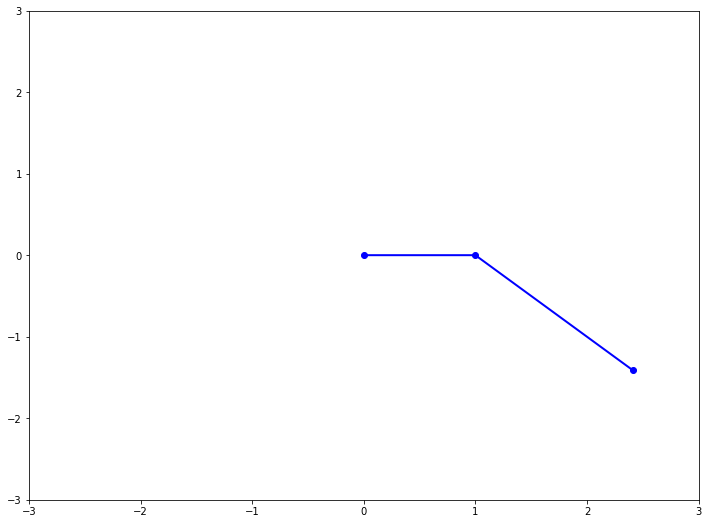

In [6]:
# application

temps, sol = euler(np.pi/2, np.pi/4, 1.5, 0, 0.05, 20)
ani = visualisation(temps, sol)

In [7]:
from IPython.display import HTML

In [8]:
HTML(ani.to_html5_video())